In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
import random
import pandas as pd

sentiments = ['positive', 'negative']

def generate_sentence():
    # Generate a random sentence
    sentence_length = random.randint(5, 15)
    sentence = ' '.join([random.choice(['I', 'You', 'They', 'We', 'He', 'She']) for _ in range(sentence_length)])

    return sentence

# Generate the dataset
dataset = []
for _ in range(100):
    sentence = generate_sentence()
    sentiment = random.choice(sentiments)
    dataset.append((sentence, sentiment))

# Convert the dataset to a Pandas DataFrame
data = pd.DataFrame(dataset, columns=['text', 'sentiment'])

# Save the dataset to a CSV file
data.to_csv('sentiment_dataset.csv', index=False)


In [3]:
# Load the dataset (assuming it is a CSV file)
import pandas as pd

data = pd.read_csv('sentiment_dataset.csv')

In [6]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))


In [9]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

In [14]:


# Load the dataset (assuming it is a CSV file)
data = pd.read_csv('sentiment_dataset.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply text preprocessing to the dataset
data['processed_text'] = data['text'].apply(preprocess_text)


In [15]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Assign sentiment scores
data['sentiment_scores'] = data['processed_text'].apply(lambda x: sia.polarity_scores(x))

# Extract the compound sentiment score
data['sentiment'] = data['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] >= 0 else 'negative')


In [16]:
data[['text', 'sentiment']]


,text,sentiment
0,They They We He He They We They We He He He He...,positive
1,They She I They You We,positive
2,You She I I You You We We You We You,positive
3,We I I You I You You They You She We We,positive
4,You We We I I You I We They You,positive
...,...,...
95,I You They We You You They You She You I,positive
96,I She He She They He I I You We They We He I You,positive
97,We They They They We,positive
98,You She They You I They I They He They I He Sh...,positive


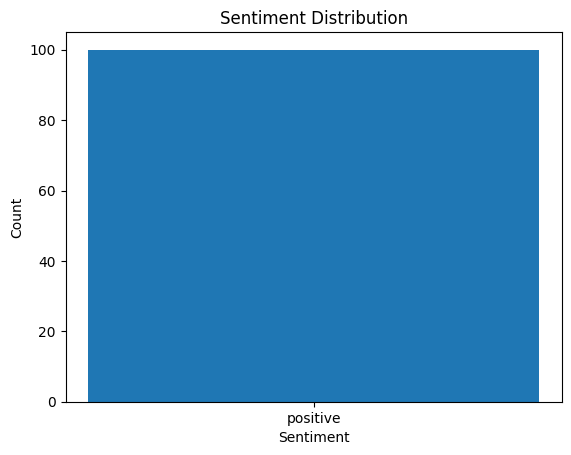

In [18]:
import matplotlib.pyplot as plt

# Count the number of data points for each sentiment label
sentiment_counts = data['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
